<a href="https://colab.research.google.com/github/marycx/ECE324-Project-Emoji-Predictor/blob/main/upload_data_preprocess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Package Installation


In [ ]:
# Install pandas
!pip install pandas

# Install langid
!pip install langid

# Install spacy
!pip install spacy

# Download the English language model in spacy
!python -m spacy download en_core_web_sm

# Install emoji
!pip install emoji==1.7

In [ ]:
import pandas as pd # read csv
import emoji # find emoji
import langid # remove non-English text
import re # remove url etc.
import spacy # lemmatization
import html

## Read CSV Data

In [ ]:
# Read the CSV file
from google.colab import files
uploaded = files.upload()

Saving dataset_twitter-scraper.csv to dataset_twitter-scraper (1).csv


In [ ]:
import io

data = pd.read_csv(io.BytesIO(uploaded['dataset_twitter-scraper.csv']))
#data = pd.read_csv("dataset_twitter-scraper.csv")

#print(data[:10])
# Open file 
import csv
l = []
with open('dataset_twitter-scraper.csv') as file_obj:
      
    heading = next(file_obj)
    reader_obj = csv.reader(file_obj)
      
    # Iterate over each row in the csv 
    # file using reader object
    for row in reader_obj:
        l.append(row)

In [ ]:
l[:20]

# Remove any Invalid Text Entries

## Remove no emoji text

In [ ]:
def isemoji(text):
  for char in text:
    #print(char)
    if char in UNICODE_EMOJI['en']:
      return 1
  return 0

In [ ]:
# Remove entries without an emoji
from emoji import UNICODE_EMOJI
import csv


# Read lines sepearately
with open("dataset_twitter-scraper.csv", 'r') as file:
  new_data = []
  csvreader = csv.reader(file, delimiter = ' ')

  count = 0 # check if I run all lines

  for idx, line in enumerate(csvreader):
    count = idx
    for char in line:  
      if isemoji(char):
        new_data.append(char)


In [ ]:
count

161805

In [ ]:
len(new_data)

56782

## Remove Non-English

In [ ]:
data = [text for text in new_data if langid.classify(text)[0] == 'en']

In [ ]:
len(data)

21281

In [ ]:
data # print to see data at this stage

## Extract Emoji as Target




In [ ]:
# Make a copy dataset that we never modify
import copy
data_dont_modify = copy.deepcopy(data)

In [ ]:
import regex

def get_emoji(text):

    emoji_list = []
    data = regex.findall(r'\X', text)
    for word in data:
        if any(char in emoji.UNICODE_EMOJI['en'] for char in word):
            emoji_list.append(word)
    
    return emoji_list

In [ ]:
text_data = []
emoji_data = []
all_emoji = []

for line in data:

  str_en = line.encode("ascii", "ignore")
  str_de = str_en.decode()
  text_data.append(str_de)

  get_emo = get_emoji(line)

  emoji_data.append(get_emo)
  # text_data.append(line)

  for i in get_emo:
    all_emoji.append(i)

In [ ]:
text_data[1]

'Were gonna have a (meat)ball on #idol tonight  https://t.co/SmeDrbOH66'

In [ ]:
all_emoji

In [ ]:
len(emoji_data)

21281

In [ ]:
len(text_data)

21281

## Remove Text with Length <3

In [ ]:
# Remove entries with length less than 3
text_data_update = []
emoji_data_update = []

for i in range(len(text_data)):
  if len(text_data[i]) >= 3:
    text_data_update.append(text_data[i])
    emoji_data_update.append(emoji_data[i])
    

In [ ]:
len(text_data_update)

21184

In [ ]:
text_data_update[1]

'We’re gonna have a (meat)ball on #idol tonight 🍝 https://t.co/SmeDrbOH66'

# Preprocess

## Remove Special Character etc.

In [ ]:
def preproc(comment, steps=range(1, 6)):

    modComm = comment

    # remove special characters
    if 1 in steps:
        modComm = re.sub(r"\n", " ", modComm)
        modComm = re.sub(r"\t", " ", modComm)
        modComm = re.sub(r"\r", " ", modComm)
        # modComm = re.sub(r'@\S+', '', modComm)
        # modComm = re.sub(r'#\S+', '', modComm)
        # modComm = re.sub(r'\\[^\s]*', '', modComm)
        # modComm = re.sub(r'\\U[0-9a-fA-F]{8}', '', modComm)
        # modComm = re.sub(r'\|\|', '', modComm)
        # modComm = re.sub(r'\|', '', modComm)

        new = ""
        for i in modComm:
          if not i.startswith('\\'):
              new+=i

    # if 2 in steps:  # unescape html
    #     modComm = html.unescape(modComm)

    # if 3 in steps:  # remove URLs
    #     modComm = re.sub(r"(http|www)\S+", "", modComm)
        
    if 2 in steps: #remove duplicate spaces.
        modComm = re.sub(" +", " ", modComm)

    return modComm

In [ ]:
preproc_data = []
for lines in text_data_update:
  if 'RT' in lines:
    lines = lines[3:]
  process_body = preproc(lines, steps=range(1,3))
  preproc_data.append(process_body)

In [ ]:
len(preproc_data)

21184

In [ ]:
preproc_data # see data that has been preprocessed

## Final Check

In [ ]:
final_text = []
final_emoji = []
all_emoji = []

for i in range(len(preproc_data)):
  preproc_data[i] = preproc_data[i].strip() # strip white spaces at beginning and end
  if re.search('[a-zA-Z]', preproc_data[i]) and preproc_data[i].count(' ') >= 2:
    final_text.append(preproc_data[i])
    final_emoji.append(emoji_data_update[i])
    for i in emoji_data_update[i]:
      all_emoji.append(i)


In [ ]:
len(all_emoji)

0

In [ ]:
len(final_emoji)

20662

In [ ]:
final_text[1332]

'To My Forever Valentine! I know you ain’t keen on this day, (Like a lot of ya’ll out there) BUT, I love it and that’s why you celebrate It, for me, which makes me adore you more! Just wait til you see what the day Has in store for you! I LOVE YOU MR.WEATHERSPOON! ♥️♥️🤎♥️♥️🤎🤎 https://t.co/PHNSHiBFF3'

## Make One Sentence corresponds to One Emoji

In [ ]:
final_data = []

for i in range(len(final_text)):
  if len(final_emoji[i]) > 1:
    emo = []
    for j in range(len(final_emoji[i])):
      add = []
      if final_emoji[i][j] not in emo:
        add.append(final_text[i])
        add.append(final_emoji[i][j])
        final_data.append(add)
        emo.append(final_emoji[i][j])
  
  else:
    add = []
    add.append(final_text[i])
    add.append(final_emoji[i][0])
    final_data.append(add)


In [ ]:
final_data

In [ ]:
len(final_data)

30556

# Data Analysis

## Most frequent emoji

In [ ]:
def most_frequent(List):
    counter = 0
    num = List[0]
     
    for i in List:
        curr_frequency = List.count(i)
        if(curr_frequency> counter):
            counter = curr_frequency
            num = i
 
    return num

In [ ]:
len(all_emoji)

35358

In [ ]:
most_freq_emo = most_frequent(all_emoji)
most_freq_emo

'❤️'

In [ ]:
all_emoji.count(most_freq_emo)

2275

In [ ]:
len(all_emoji)

35358

## Number of frequency of each emoji

In [ ]:
emoji_set = set(all_emoji)

In [ ]:
num_occurence_emoji = []

for i in emoji_set:

  num_occurence_emoji.append(all_emoji.count(i))



In [ ]:
sorted(num_occurence_emoji)[-5:]

[613, 638, 1370, 2042, 2275]

In [ ]:
count_w = sorted(num_occurence_emoji)
len(count_w)

1274

In [ ]:
count_w[-50]

158

In [ ]:
emoji_set = list(emoji_set)

most_frequent_emoji50 = []

for j in range(len(num_occurence_emoji)):
    if num_occurence_emoji[j] >= 158:
      most_frequent_emoji50.append(emoji_set[j])

In [ ]:
(most_frequent_emoji50)

In [ ]:
new_final_data = []
count = 0
for j in final_data:
  count+=1
  if j[1] in most_frequent_emoji50:
    
    new_final_data.append(j)

In [ ]:
len(num_occurence_emoji)

1275

In [ ]:
(list(emoji_set))

[None]

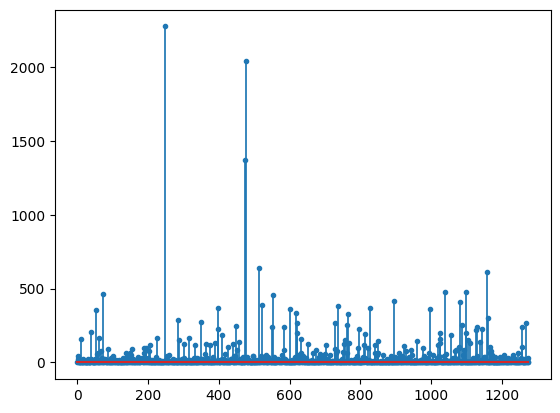

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

xpoints = np.linspace(start = 0, stop = 1275, num = 1274)



markerline, stemline, baseline, = plt.stem(xpoints,num_occurence_emoji)
plt.setp(stemline, linewidth = 1.25)
plt.setp(markerline, markersize = 3)


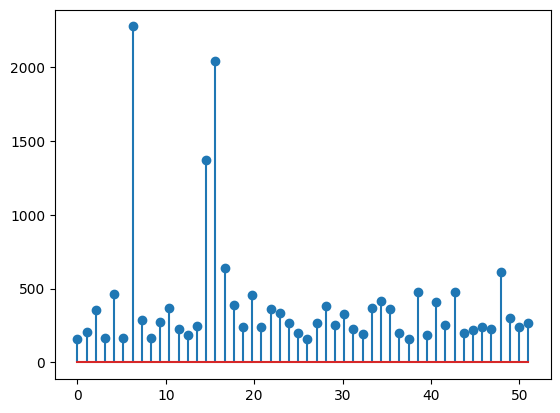

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

xpoints = np.linspace(start = 0, stop = 51, num = 50)
# print(len(xpoints))
y_point = []

for i in num_occurence_emoji:
  if i >= 158:
    y_point.append(i)

plt.stem(xpoints, y_point)
plt.show()

In [ ]:
num_occurence_emoji.count(1)

329

In [ ]:
count_w[-30:]

## Calculate # of emojis

In [ ]:
number_emoji = len(set(emoji_number))
number_emoji

1270

## Find max length of a sentence

In [ ]:
max_length = -1

for i in range(len(final_text)):
  length = final_text[i].count(' ')
  
  if length > max_length:
    max_length = length

num_words = max_length+1

num_words

81

# Save to CSV for Further Steps

## Convert Emoji to Number for Training

In [ ]:
emoji_number=[]

for i in new_final_data:
    if i[1] not in emoji_number:
        emoji_number.append(i[1])
        
csv_data=[]
for i in new_final_data:
    csv_data.append(emoji_number.index(i[1]))

In [ ]:
# Save a Emoji-Number reference CSV file for later if needed
ref = []
for ind, emo in enumerate(emoji_number):
  add = []
  add.append(ind)
  add.append(emo)
  ref.append(add)

with open('emoji_to_number_ref_50', 'w') as f:
    # create the csv writer
    writer = csv.writer(f)
    for i in ref:
    # write a row to the csv file
      writer.writerow(i)
f.close()

In [ ]:
len(csv_data)

16340

In [ ]:
final_csv_data = []

for i in range(len(new_final_data)):
  add = []
  add.append(new_final_data[i][0])
  add.append(csv_data[i])
  final_csv_data.append(add)
 

In [ ]:
new_final_data[897]

['@LeanneMix96: What an amazing night!!! @LittleMix #ConfettiTour https://t.co/BYGgd721kZ',
 '🎉']

In [ ]:
final_csv_data[897]

['@LeanneMix96: What an amazing night!!! @LittleMix #ConfettiTour https://t.co/BYGgd721kZ',
 11]

## Write to CSV

In [ ]:
# With actual emoji
with open('data_preproc_emoji_50', 'w') as f:
    # create the csv writer
    writer = csv.writer(f)
    for i in new_final_data:
    # write a row to the csv file
      writer.writerow(i)
f.close()


In [ ]:
print(final_data[24])

['anyway watch #idol rn and let me know what YOU did for your 21st (that you can remember) ⬇️', '⬇️']


In [ ]:
# With emoji converted to number
with open('data_preproc_csv_50', 'w') as f:
    # create the csv writer
    writer = csv.writer(f)
    for i in final_csv_data:
    # write a row to the csv file
      writer.writerow(i)
f.close()